# ✈️ **AI Travel Agent & Expense Planner**

> **Purpose:**  
Trip planning for any city worldwide with real-time data and detailed cost estimation.

---

## 📝 **Assignment Objectives**

Build an **AI Travel Agent & Expense Planner** that performs the following:

- ✅ Real-time weather information retrieval  
- ✅ Discovery of top attractions and activities  
- ✅ Hotel cost estimation (per day × total days)  
- ✅ Currency conversion to the user’s native currency  
- ✅ Full itinerary generation for the trip  
- ✅ Total expense calculation  
- ✅ Summary generation of the complete trip

---

## ⚙️ **Workflow Overview**

### 1. 🧍 User Input

User provides:
- Destination city
- Number of days
- Budget range
- Native currency

---

### 2. 📍 Search Attractions and Activities

- `search_attractions()`: Find popular tourist spots
- `search_restaurants()`: List recommended local restaurants
- `search_activities()`: Recommend city-specific activities
- `search_transportation()`: Suggest transport options within the city

---

### 3. 🌦️ Get Weather Forecast

- `get_current_weather(city)`: Fetch real-time weather  
- `get_weather_forecast(city, days)`: Get forecast for entire trip duration

---

### 4. 🏨 Search Hotels & Estimate Cost

- `search_hotels(city)`: Retrieve hotels based on location and budget  
- `estimate_hotel_cost(rate_per_night, total_days)`: Calculate total accommodation cost  
- `suggest_budget_range(user_budget)`: Validate or suggest budget range

---

### 5. 💰 Calculate Total Expense

- `calculate_total_cost(items: List[float])`: Add up all components  
- `calculate_daily_budget(total_cost, days)`: Derive average daily spend  

---

### 6. 💱 Currency Conversion

- `get_exchange_rate(from_currency, to_currency)`: Fetch real-time rates  
- `convert_currency(amount, rate)`: Convert expense to user’s currency  

---

### 7. 🗓️ Generate Itinerary

- `get_day_plan(day_number)`: Suggest day-wise plan  
- `create_full_itinerary(num_days)`: Assemble full itinerary

---

### 8. 📋 Trip Summary

- `generate_summary(trip_data)`: Summarize trip details, costs, and plan

---

## 🔁 Final Output

Return the **complete travel plan**, including:
- Weather forecast
- Attractions and activities
- Hotel information
- Daily and total costs
- Itinerary
- Currency-adjusted expenses
- Summary of entire trip

---

## 🧱 OOP Design Hint (If Using Classes)

> **Recommended Classes:**
- `TravelPlanner`: Core controller  
- `WeatherService`: Handles weather-related operations  
- `AttractionFinder`: Finds attractions, restaurants, and activities  
- `HotelService`: Manages hotel searches and cost estimation  
- `CurrencyConverter`: Converts between currencies  
- `ItineraryBuilder`: Constructs the full itinerary  
- `TripSummary`: Creates a final summary

Use `@tool` decorated methods inside each class for LangGraph tool support.

---

## ✅ Note

> Try to design the entire system using **Object-Oriented Programming** for modularity and clarity.



## Model define

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate

In [6]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
weather_api = os.getenv("WEATHER_API")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [5]:
llm = ChatGroq(model="qwen/qwen3-32b")

llm.invoke("Test line")

AIMessage(content='<think>\nOkay, the user sent "Test line". Let me figure out how to respond. It seems like they might be checking if I\'m working or testing the system. I should acknowledge their message and offer help. Maybe say something like "Hello! How can I assist you today?" to be friendly and open. That way, they know I\'m here and ready to help. No need to overcomplicate it since they just sent a test line.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 104, 'prompt_tokens': 10, 'total_tokens': 114, 'completion_time': 0.212039638, 'prompt_time': 0.000325654, 'queue_time': 0.052353726999999996, 'total_time': 0.212365292}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'stop', 'logprobs': None}, id='run--95e2aa8e-0fe3-4559-b71b-f07ee3e766b1-0', usage_metadata={'input_tokens': 10, 'output_tokens': 104, 'total_tokens': 114})

## **Weather tools**

In [7]:
from langchain_core.tools import tool
import requests

@tool
def get_current_weather(city: str) -> str:
    """
    Fetches the current weather conditions for a given city.

    input: city (string)

    output: Current temperature, condition (e.g., "Sunny, 25°C")
    """
    url = f"http://api.weatherstack.com/current?access_key={weather_api}&query={city}"
    response = requests.get(url)
    return response.json()
    

## Testing
get_current_weather.invoke("Dhaka")

{'request': {'type': 'City',
  'query': 'Dhaka, Bangladesh',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Dhaka',
  'country': 'Bangladesh',
  'region': '',
  'lat': '23.723',
  'lon': '90.409',
  'timezone_id': 'Asia/Dhaka',
  'localtime': '2025-06-18 12:48',
  'localtime_epoch': 1750250880,
  'utc_offset': '6.0'},
 'current': {'observation_time': '06:48 AM',
  'temperature': 27,
  'weather_code': 266,
  'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0017_cloudy_with_light_rain.png'],
  'weather_descriptions': ['Light drizzle'],
  'astro': {'sunrise': '05:12 AM',
   'sunset': '06:47 PM',
   'moonrise': '12:00 AM',
   'moonset': '11:27 AM',
   'moon_phase': 'Last Quarter',
   'moon_illumination': 59},
  'air_quality': {'co': '377.4',
   'no2': '16.28',
   'o3': '71',
   'so2': '14.06',
   'pm2_5': '9.065',
   'pm10': '9.065',
   'us-epa-index': '1',
   'gb-defra-index': '1'},
  'wind_speed': 20,
  'wind_degree': 169,
  'wind_dir': '

### Weather forecast tools

In [9]:
@tool
def get_weather_forecast(city: str, days: int = 5) -> str:
    """
    Fetches weather forecast for a given city.

    input: city (string), days (int, default 5)
    output: Weather forecast for next few days
    """
    try:
        # Get city coordinates
        geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1"
        geo_response = requests.get(geo_url)
        geo_data = geo_response.json()
        
        if not geo_data.get('results'):
            return f"Error: Could not find {city}"
        
        lat = geo_data['results'][0]['latitude']
        lon = geo_data['results'][0]['longitude']
        
        # Get forecast (free, no API key)
        forecast_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&daily=temperature_2m_max,temperature_2m_min,weather_code&forecast_days={days}"
        response = requests.get(forecast_url)
        data = response.json()
        
        forecast_text = f"Weather forecast for {city}:\n"
        
        conditions = {
            0: "Clear", 1: "Mostly clear", 2: "Partly cloudy", 3: "Overcast",
            45: "Foggy", 51: "Light drizzle", 61: "Light rain", 63: "Rain", 
            71: "Light snow", 95: "Thunderstorm"
        }
        
        for i in range(len(data['daily']['time'])):
            date = data['daily']['time'][i]
            max_temp = data['daily']['temperature_2m_max'][i]
            min_temp = data['daily']['temperature_2m_min'][i]
            code = data['daily']['weather_code'][i]
            condition = conditions.get(code, "Unknown")
            
            forecast_text += f"{date}: {condition}, High {max_temp}°C, Low {min_temp}°C\n"
        
        return forecast_text
        
    except Exception as e:
        return f"Error: {str(e)}"

response = get_weather_forecast.invoke(
    {
        "city": "dhaka",
        "days": 5
    }
)
response

'Weather forecast for dhaka:\n2025-06-18: Thunderstorm, High 28.5°C, Low 25.9°C\n2025-06-19: Thunderstorm, High 29.7°C, Low 25.9°C\n2025-06-20: Thunderstorm, High 30.4°C, Low 25.7°C\n2025-06-21: Thunderstorm, High 28.7°C, Low 25.8°C\n2025-06-22: Unknown, High 32.0°C, Low 26.2°C\n'

In [10]:
load_dotenv()
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

In [14]:
from langchain_community.utilities import GoogleSerperAPIWrapper

search = GoogleSerperAPIWrapper()

search.run("best hotels in dhaka under 5000 taka")

'Cheap Hotels in Dhaka City. Comfy stays at affordable prices, with plenty of options in popular neighborhoods. Missing: 5000 | Show results with:5000. The best cheap hotels in Dhaka · HOTEL THE CAPITAL LTD. · Hotel Shuktara Dhaka · Hostel by zooFamily · HOTEL STUDiO23 · Holiday Inn Dhaka City Centre by IHG. Missing: 5000 | Show results with:5000. Value for money hotels in Dhaka ; White House Hotel. 28 reviews ; Hotel 71. 378 reviews ; Hotel Family Inn. 1 reviews ; Washington Hotel. 63 reviews. 1. Le Méridien Dhaka · 2. The Westin Dhaka · 3. Radisson Blu Dhaka Water Garden. 4. Pan Pacific Sonargaon Dhaka. Continue Reading. As there are ... Travel with comfort when booking a room with Pan Pacific Sonargaon Dhaka, the most popular 5-star hotel in Dhaka (8.2/10 rating - based on 365 reviews). There ... Missing: 5000 taka. 1. Le Méridien Dhaka · 2. The Westin Dhaka · 3. Radisson Blu Dhaka Water Garden. 4. Pan Pacific Sonargaon Dhaka. Looking for Dhaka Hotel? 2-star hotels from $10, 3 stars

## Search Hotel Tools

In [16]:
@tool
def search_hotels(city: str, budget: int) -> str:
    """search hotel in the city under the user budget
    Args:
        city: str (which city user want to travel)
        budget: int (how much money user want to pay for hotel)
    
    output: it will provide some hotel name and cost such as day or week or the hotel policy wise.
    
    
    """
    search = GoogleSerperAPIWrapper()
    
    query = f"best hotel in {city} under ${budget}"
    
    response = search.run(query)
    return response


search_hotels.invoke(
    {
        "city": "dhaka",
        "budget": 100
    }
)
    

"Cheap Hotels in Dhaka City · 1. Hotel Tropical Daisy · 2. Lakeshore Banani · 3. Hotel 71 · 4. The Westin Dhaka · 5. Royal Park Residence. Missing: $100 | Show results with:$100. These Dhaka hotels have the best prices for their ratings ; Central Inn Photo. Central Inn · 7.3. 4 stars ; Taz Garden House Photo. Taz Garden House · 7.5. 2 stars. Missing: $100 | Show results with:$100. The best cheap hotels in Dhaka · Hotel New Kalabgan Residential, hotel in Dhaka · Hotel Shuktara Dhaka, hotel in Dhaka · Hotel Prime Inn Mirpur, hotel in Dhaka ... Missing: $100 | Show results with:$100. Looking for Dhaka Hotel? 2-star hotels from $10, 3 stars from $19 and 4 stars+ from $25. Stay at hotel al-sarwar from $11/night, Hotel Labbaik Farmgate from ... Affordable hotels or hostels near the InterContinental/Shahbagh area. Budget-friendly food options. Places I can visit for fun, especially ... Some of the best cheap hotels in Dhaka include Hotel 71, Tropical Daisy, Richmond Hotel and Suites, Innotel 

In [24]:
from langchain_core.tools import tool
from pydantic import BaseModel, Field


@tool
def estimate_hotel_cost(price_per_night: float, total_days: int) -> float:
    """Estimate total hotel cost based on price per night and number of days.
    
    price_per_night: float (description="Price per night of the selected hotel in USD")
    total_days: int (description="Total number of days the user will stay")
    
    """
    try:
        return round(price_per_night * total_days, 2)
    except Exception as e:
        return str(e)


estimate_hotel_cost.invoke({
    "price_per_night": 85.0,
    "total_days": 4
})


340.0

In [25]:
from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from pydantic import BaseModel, Field
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

## search attraction

In [26]:
@tool
def search_attractions(city: str) -> str:
    """
    Search top tourist attractions in a given city.

    Args:
        city (str): Name of the city to search for tourist attractions.

    Returns:
        str: A list of top tourist attractions or places of interest.
    """
    tavily = TavilySearch(max_results=5)
    return tavily.invoke(f"top tourist attractions in {city}")

search_attractions("dhaka")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18724\3463076412.py:15: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search_attractions("dhaka")


{'query': 'top tourist attractions in dhaka',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': '50+Best Places To Visit In Dhaka [Tourist Attractions To See] - Travelvibe',
   'url': 'https://travelvibe.net/best-places-to-visit-in-dhaka/',
   'content': "Join us as we embark on a journey to uncover Dhaka's top tourist attractions and things to do, allowing you to truly immerse yourself in the essence of Bangladesh's dynamic capital. Table of Contents. Beyond Borders: Best Places to Visit in Dhaka for Tourists. 1. Lalbagh Fort/লালবাগ কেল্লা",
   'score': 0.910998,
   'raw_content': None},
  {'title': "13 Places to visit in Dhaka you can't miss on your trip - Nijhoom",
   'url': 'https://nijhoom.com/dhaka-tourist-attractions/',
   'content': "One of the top places to visit in Dhaka City for history. Lalbagh Fort is a 17th-century Mughal fort and one of the key tourist attractions in Dhaka. The fort's construction was started in 1678 by Prince Muhammed 

In [29]:
@tool
def search_restaurants(city: str) -> str:
    """
    Search the best restaurants in a given city.

    Args:
        city (str): Name of the city to search for restaurants.

    Returns:
        str: A list of popular restaurants to try.
    """
    tavily = TavilySearch(max_results=5)
    return tavily.run(f"best restaurants to try in {city}")


@tool
def search_activities(city: str) -> str:
    """
    Search top activities or things to do in a city.

    Args:
        city (str): Name of the city to search for fun activities.

    Returns:
        str: A list of popular activities or experiences in the city.
    """
    tavily = TavilySearch(max_results=5)
    return tavily.run(f"fun activities to do in {city}")

@tool
def search_transportation(city: str) -> str:
    """
    Search transportation options in a city.

    Args:
        city (str): Name of the city to search for transport details.

    Returns:
        str: Transportation options like bus, metro, taxi, and car rental.
    """
    # serper = GoogleSerperAPIWrapper()
    # return serper.run(f"transportation options in {city} for tourists")
    
    tavily = TavilySearch(max_results=5)
    return tavily.run(f"list of transportation options in {city} for tourists")


search_transportation("dhaka")



{'query': 'list of transportation options in dhaka for tourists',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Dhaka Transport - Dhaka, Bangladesh transportation information ...',
   'url': 'https://www.worldexecutive.com/locations/asia_pacific/bangladesh/dhaka/transport.html',
   'content': 'Dhaka - Transportation. Dhaka Transportation. By Road. Taxis and buses are the most popular ways to travel and see the sights and sounds of the city, with fares being amongst the cheapest in the world. Express and non-stop services are available to principal towns from Gabtoli, Saidabad and Mohakhai bus terminals in Dhaka.',
   'score': 0.84707206,
   'raw_content': None},
  {'title': 'Best Public Transport Services in Dhaka - Bengal Insider',
   'url': 'https://bengalinsider.com/best-public-transport-services-in-dhaka/',
   'content': "In Dhaka, a variety of public transport options cater to the city's bustling demands efficiently. Rickshaws, deeply entren

## Calculate total cost tools

In [30]:
from langchain_core.tools import tool

@tool
def add(a: float, b: float) -> float:
    """
    Add two numbers.

    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The sum of a and b.
    """
    return round(a + b, 2)


@tool
def multiply(a: float, b: float) -> float:
    """
    Multiply two numbers.

    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The product of a and b.
    """
    return round(a * b, 2)


@tool
def calculate_total_cost(hotel_cost: float, activity_cost: float, transport_cost: float) -> float:
    """
    Calculate the total cost of the trip.

    Args:
        hotel_cost (float): Total hotel cost.
        activity_cost (float): Total activity/entertainment cost.
        transport_cost (float): Total transportation cost.

    Returns:
        float: Combined total trip cost.
    """
    return round(hotel_cost + activity_cost + transport_cost, 2)


@tool
def calculate_daily_budget(total_cost: float, days: int) -> float:
    """
    Calculate daily budget based on total cost and number of days.

    Args:
        total_cost (float): Total expense for the trip.
        days (int): Total number of travel days.

    Returns:
        float: Estimated daily budget.
    """
    if days <= 0:
        raise ValueError("Days must be greater than zero.")
    return round(total_cost / days, 2)


## Currency conversion Factor



In [32]:
import requests
from langchain_core.tools import tool

EXCHANGE_API_KEY = os.getenv("EXCHANGE_RATE_API")

@tool
def get_conversion_factor(base_currency: str, target_currency: str) -> float:
    """
    Fetch the currency conversion rate between two currencies.

    Args:
        base_currency (str): The code of the base currency (e.g., 'USD').
        target_currency (str): The code of the currency to convert to (e.g., 'BDT').

    Returns:
        float: The conversion rate from base_currency to target_currency.
    """
    url = f"https://v6.exchangerate-api.com/v6/{EXCHANGE_API_KEY}/pair/{base_currency}/{target_currency}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200 and data.get("conversion_rate"):
        return float(data["conversion_rate"])
    else:
        raise ValueError(f"Failed to get conversion rate: {data}")


In [34]:
get_conversion_factor(
    {
        "base_currency": "USD",
        "target_currency": "BDT"
    }
)

122.2005

## conversion factor

In [33]:
@tool
def convert_currency(amount: float, conversion_rate: float) -> float:
    """
    Convert an amount from base currency to target currency using a conversion rate.

    Args:
        amount (float): Amount in base currency.
        conversion_rate (float): Conversion rate to target currency.

    Returns:
        float: Amount in target currency.
    """
    return round(amount * conversion_rate, 2)


## Itinery genration tools

In [35]:
from langchain_core.tools import tool

@tool
def get_day_plan(city: str, interests: str = "sightseeing, local food, culture") -> str:
    """
    Generate a one-day itinerary for a city based on user interests.

    Args:
        city (str): Name of the city to plan for.
        interests (str): Interests like sightseeing, food, culture.

    Returns:
        str: A detailed one-day plan with times, locations, and activities.
    """
    return (
        f"You are planning a 1-day trip in {city}. "
        f"Generate a time-based schedule from 9:00 AM to 9:00 PM, including {interests}. "
        f"Include breakfast, lunch, dinner, 3-5 key attractions, and time for rest/shopping."
    )


@tool
def create_full_itinerary(city: str, days: int, interests: str = "sightseeing, food") -> str:
    """
    Generate a full multi-day itinerary for a city.

    Args:
        city (str): Destination city.
        days (int): Number of days for the trip.
        interests (str): User interests.

    Returns:
        str: A complete day-wise itinerary.
    """
    return (
        f"Create a {days}-day itinerary for {city}, including activities based on {interests}. "
        f"Each day should include breakfast, lunch, dinner, 3–4 attractions, and cultural or relaxing activities. "
        f"Keep plans balanced and avoid repeating the same spots."
    )


## Create the trip summary

In [36]:
from langchain_core.tools import tool

@tool
def create_trip_summary(city: str, days: int, total_cost: float, currency: str = "USD") -> str:
    """
    Generates a high-level trip summary for the user.

    Args:
        city (str): Destination city for the trip.
        days (int): Number of days planned for the trip.
        total_cost (float): Total estimated cost of the trip in the specified currency.
        currency (str): Currency code, e.g., USD, EUR, BDT.

    Returns:
        str: Prompt instruction for the LLM to summarize the trip.
    """
    return (
        f"Generate a short and friendly trip summary for a {days}-day trip to {city}. "
        f"The estimated total cost is {total_cost:.2f} {currency}. "
        f"Include the number of days, cost estimate, and encourage the traveler. "
        f"End with a line like: 'Have a wonderful trip to {city}!'"
    )


## Complete trip plan

In [39]:
from langchain_core.tools import tool

@tool
def return_complete_travel_plan(city: str, days: int) -> str:
    """
    Returns a final instruction to the LLM to compile all parts of the trip into a single, complete plan.

    Args:
        city (str): Destination city.
        days (int): Duration of the trip in days.

    Returns:
        str: Prompt to compile all previous data into a final travel plan output.
    """
    return (
        f"Assemble a complete travel plan for a {days}-day trip to {city}. "
        f"Include these sections in order:\n"
        f"1. 🌍 Destination and Duration\n"
        f"2. 🌤️ Weather Forecast Summary\n"
        f"3. 🏙️ Top Attractions\n"
        f"4. 🍽️ Recommended Restaurants\n"
        f"5. 🚗 Transportation Tips\n"
        f"6. 🛏️ Hotel Info and Estimated Cost\n"
        f"7. 📅 Full Day-wise Itinerary\n"
        f"8. 💰 Total Trip Expense and Currency Conversion\n"
        f"9. ✨ Final Trip Summary\n\n"
        f"Ensure everything is well-formatted, friendly, and easy to follow."
    )


In [43]:
SYSTEM_PROMPT = """

You are an AI Travel Planner and Expense Manager. Your task is to assist users in planning trips to any city worldwide using reasoning and tools.

You follow the **ReAct pattern**:
1. Think about what the user needs.
2. Decide which tool to use and why.
3. Call the tool using the correct arguments.
4. Observe the result.
5. Repeat reasoning and tool usage as needed.
6. Finally, return a complete, friendly, and well-organized travel plan.

You have access to the following tools:

1. `search_attractions(city: str)` - Find top tourist attractions in the city.
2. `search_restaurants(city: str)` - Find popular places to eat.
3. `search_activities(city: str)` - Find fun or cultural activities in the city.
4. `search_transportation(city: str)` - Get information about transport options.
5. `get_current_weather(city: str)` - Check the current weather.
6. `get_weather_forecast(city: str)` - Get the weather forecast for upcoming days.
7. `search_hotels(city: str, budget: int)` - Search for hotels within a user’s budget.
8. `estimate_hotel_cost(cost_per_day: float, total_days: int)` - Estimate total hotel cost.
9. `add(a: float, b: float)` - Add two values.
10. `multiply(a: float, b: float)` - Multiply two values.
11. `calculate_total_cost(hotel_cost: float, misc_cost: float)` - Add up all costs.
12. `calculate_daily_budget(total_cost: float, days: int)` - Estimate daily budget.
13. `get_conversion_factor(base_currency: str, target_currency: str)` - Get exchange rate.
14. `convert(base_currency: float, conversion_rate: float)` - Convert between currencies.
15. `create_itinerary_prompt(city: str, days: int)` - Generate a full day-wise itinerary.
16. `create_trip_summary(city: str, days: int, total_cost: float, currency: str)` - Generate a brief trip summary.
17. `return_complete_travel_plan(city: str, days: int)` - Compile and return a complete travel plan.

Be thoughtful and structured. Use tools only when required. Wait for tool results before deciding the next step.

If the user provides a destination and number of days, start by gathering key information like attractions, weather, and hotels. Calculate costs, convert currency, generate an itinerary, and end with a trip summary.

Your final response must be complete and organized, using markdown formatting (headers, bullet points) for easy reading. You should never hallucinate data — always use tools to get real-time or accurate info.

Let's get started.


"""

In [40]:
tools = [get_current_weather, get_weather_forecast, search_hotels, estimate_hotel_cost, search_attractions, search_restaurants, search_activities, search_transportation, add, multiply, calculate_total_cost, calculate_daily_budget, get_conversion_factor, convert_currency, get_day_plan, create_full_itinerary, create_trip_summary, return_complete_travel_plan]

In [41]:
llm_with_tools = llm.bind_tools(tools)

In [42]:
llm_with_tools.invoke(
    "Hi, I want to take a 5-day trip to Kyoto next month. My hotel budget is around $70 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in Japanese Yen, but my native currency is USD. Also, I prefer local food and public transportation. Can you plan it all for me?"
)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3f6bnhpj3', 'function': {'arguments': '{"city":"Kyoto","days":5}', 'name': 'get_weather_forecast'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 255, 'prompt_tokens': 1259, 'total_tokens': 1514, 'completion_time': 0.554637304, 'prompt_time': 0.05323073, 'queue_time': 0.011481639000000009, 'total_time': 0.607868034}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6ba283af-6494-4c93-afd2-a4c832f299d2-0', tool_calls=[{'name': 'get_weather_forecast', 'args': {'city': 'Kyoto', 'days': 5}, 'id': '3f6bnhpj3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1259, 'output_tokens': 255, 'total_tokens': 1514})

In [44]:
from langgraph.graph import END, MessagesState

In [45]:
def call_model(state: MessagesState):
    question = state["messages"]
    
    question_with_system_prompt = [SYSTEM_PROMPT] + question
    
    response = llm_with_tools.invoke(question_with_system_prompt)
    
    return {
        "messages": [response]
    }

In [46]:
from langgraph.graph import StateGraph, START

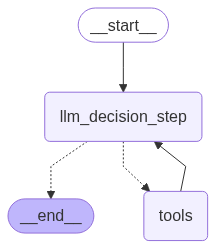

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(MessagesState) 

builder.add_node("llm_decision_step", call_model)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_decision_step")
builder.add_conditional_edges(
    "llm_decision_step",
    ## if last messages is tools call then call the tools
    ## if last messages is not tools call return end
    tools_condition
)
builder.add_edge("tools", "llm_decision_step")

react_agent = builder.compile()

from IPython.display import display, Image

display(Image(react_agent.get_graph().draw_mermaid_png()))

In [48]:
input = "Hi, I want to take a 5-day trip to Kyoto next month. My hotel budget is around $70 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in Japanese Yen, but my native currency is USD. Also, I prefer local food and public transportation. Can you plan it all for me?"

In [49]:
output = react_agent.invoke(
    {
        "messages": [input]
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I want to take a 5-day trip to Kyoto next month. My hotel budget is around $70 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in Japanese Yen, but my native currency is USD. Also, I prefer local food and public transportation. Can you plan it all for me?
================================== Ai Message ==================================
Tool Calls:
  get_weather_forecast (w3rw6yrvs)
 Call ID: w3rw6yrvs
  Args:
    city: Kyoto
    days: 5
================================= Tool Message =================================
Name: get_weather_forecast

Weather forecast for Kyoto:
2025-06-18: Partly cloudy, High 33.4°C, Low 21.8°C
2025-06-19: Mostly clear, High 33.8°C, Low 20.4°C
2025-06-20: Partly cloudy, High 34.3°C, Low 21.6°C
2025-06-21: Light rain, High 31.0°C, Low 22.0°C
2025-06-22: Rain, High 23.8°C, Low 22.0°C

===

In [52]:
from IPython.display import Markdown

Markdown(output["messages"][-1].content)

# ✨ 5-Day Kyoto Travel Plan for June 2025 ✨  

## 🌤️ Weather Forecast  
- **June 18–22**: Warm days (23–34°C) with partly cloudy skies. Light rain expected on **Day 4**, and **Day 5** will be cooler with rain.  
- **Tip**: Pack light clothing and a compact umbrella for the final two days.  

---

## 🏨 Hotel Cost Estimate  
- **Budget**: $70/night × 5 days = **$350 USD**  
- **Converted to JPY**: $350 × 145.13 = **¥50,796**  

---

## 📍 Must-Visit Attractions  
1. **Heian Shrine** – Vibrant red torii gate and cherry-blossom beauty.  
2. **Kiyomizu-dera Temple** – Iconic wooden stage with panoramic views.  
3. **Arashiyama Bamboo Forest** – Serene pathways through towering bamboo.  
4. **Fushimi Inari Shrine** – Thousands of vermillion torii gates.  
5. **Ryoan-ji Temple** – Zen rock garden meditation.  

---

## 🍣 Local Food Highlights  
- **Azuma Sushi** – Affordable, fresh sushi in Higashiyama.  
- **Sakuragawa** – Kaiseki (multi-course traditional dining).  
- **Nishiki Market** – Sample yuba (tofu skin), matcha sweets, and local pickles.  

---

## 🚇 Transportation Options  
- **Subway/Bus Pass**: Efficient for city travel (¥3,000–¥5,000/day).  
- **Raku Tourist Bus**: Direct routes to top attractions (¥1,200/ride).  
- **Biking**: Rent a bike for ¥1,500/day to explore quieter neighborhoods.  

---

## 🎫 Activities & Tours  
- **Tea Ceremony Experience** (¥3,000–¥5,000).  
- **Kimono Rental** (¥5,000–¥8,000) with guided tours.  
- **Guided Temple Tours** (¥8,000–¥12,000 for 3–4 sites).  

---

## 💰 Cost Breakdown  
| Category              | USD Estimate | JPY Estimate       |  
|-----------------------|--------------|--------------------|  
| **Hotel**             | $350         | ¥50,796            |  
| **Food**              | $150         | **¥21,769**        |  
| **Transportation**    | $100         | **¥14,513**        |  
| **Activities**        | $100         | **¥14,513**        |  
| ****Total**           | **$700**     | **¥101,591**       |  

---

## 🗓️ Sample Daily Itinerary  
### **Day 1**:  
- Morning: Kiyomizu-dera Temple + Higashiyama Walking Tour  
- Afternoon: Nishiki Market + Lunch at Omen Udon  
- Evening: Gion District (traditional tea houses)  

### **Day 2**:  
- Morning: Fushimi Inari Shrine  
- Afternoon: Arashiyama Bamboo Forest & Togetsukyo Bridge  
- Evening: Sushi at Azuma Sushi  

### **Day 3**:  
- Full-day Guided Temple Tour (Ryoan-ji, Tofuku-ji, Nanzen-ji)  

### **Day 4**:  
- Morning: Philosopher’s Path + Shoren-in Temple  
- Afternoon: Rainy Day Plan: Kyoto National Museum + Shojin-ryori Lunch  

### **Day 5**:  
- Morning: Tea Ceremony at Camellia Tea House  
- Afternoon: Departure or Optional Shopping at Kyoto Station  

---

## 📌 Final Notes  
- **Currency**: Total trip cost ≈ **¥101,591** (based on USD→JPY rate).  
- **Rain Preparation**: Carry an umbrella for Days 4–5.  
- **Packing Tips**: Lightweight clothing, comfortable walking shoes, reusable water bottle.  

Enjoy your trip to Kyoto! Let me know if you’d like adjustments to the itinerary or help booking accommodations. 🌸

In [55]:
input = "Hi, I want to take a 5-day trip to Dhaka next month. My hotel budget is around $70 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in bangladeshi Taka, but my native currency is USD. Also, I prefer local food and public transportation. Can you plan it all for me?"

In [56]:
output = react_agent.invoke(
    {
        "messages": [input]
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I want to take a 5-day trip to Dhaka next month. My hotel budget is around $70 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in bangladeshi Taka, but my native currency is USD. Also, I prefer local food and public transportation. Can you plan it all for me?
================================== Ai Message ==================================
Tool Calls:
  get_weather_forecast (8h7mntq6v)
 Call ID: 8h7mntq6v
  Args:
    city: Dhaka
    days: 5
================================= Tool Message =================================
Name: get_weather_forecast

Weather forecast for Dhaka:
2025-06-18: Thunderstorm, High 28.8°C, Low 26.1°C
2025-06-19: Unknown, High 30.0°C, Low 26.1°C
2025-06-20: Thunderstorm, High 30.2°C, Low 25.7°C
2025-06-21: Unknown, High 32.0°C, Low 25.7°C
2025-06-22: Overcast, High 32.9°C, Low 26.4°C

=====

In [58]:
Markdown(output["messages"][-1].content)

### 🌧️ **Weather Forecast for Dhaka (5 Days)**  
- **June 18–22, 2025**:  
  - **June 18**: Thunderstorm, 28.8°C  
  - **June 19**: Unknown, 30.0°C  
  - **June 20**: Thunderstorm, 30.2°C  
  - **June 21**: Unknown, 32.0°C  
  - **June 22**: Overcast, 32.9°C  
  *Tip: Pack an umbrella and lightweight clothing. Avoid outdoor plans on stormy days (June 18 & 20).*

---

### 💰 **Currency Conversion**  
- **Exchange Rate**: 1 USD = **122.20 BDT**  
- *All costs will be listed in USD and converted to BDT for clarity.*

---

### 🏨 **Hotel Recommendations (Under $70/night)**  
1. **Hotel Labbaik Farmgate** (Budget-friendly, 3-star)  
2. **Hotel Tropical Daisy** (4.9/5 rating)  
3. **Hotel Afford Inn** (Affordable, central location)  

*Estimated 5-night cost*: **$350 USD** (350 × 122.20 = **42,770 BDT**).

---

### 🌟 **Top Attractions in Dhaka**  
1. **Lalbagh Fort** (Mughal architecture)  
2. **Suhrawardy Udyan** (Historical garden)  
3. **National Museum** (Bangladesh’s independence history)  
4. **Ramna Park** (Outdoor recreation)  
5. **Star Mosque** (Unique modern architecture)  

*Entry fees*: Most attractions are **free or low-cost** (< $2).  

---

### 🍽️ **Local Cuisine Highlights**  
1. **Yum Cha District** (Asian fusion with scenic views)  
2. **Cafe Mango** (Gulshan’s modern-traditional blend)  
3. **Istanbul Restaurant** (Turkish-inspired, rooftop dining)  
4. **Local street food** (Panta bhat, shingara, and biryani)  

*Estimated daily food cost*: **$30 USD** (30 × 122.20 = **3,666 BDT/day**).  

---

### 🚇 **Transportation Tips**  
- **Public transport**: Use **buses** or **cycle-rickshaws** (30–100 BDT per ride).  
- **Rickshaw/family**: 150–300 BDT/day for private transport.  
- *Estimated total transport cost*: **$50 USD** (50 × 122.20 = **6,110 BDT**).  

---

### 🧾 **Total Cost Estimate**  
| Category         | USD Cost | BDT Cost (Converted) |
|------------------|----------|----------------------|
| **Hotel (5 nights)** | $350     | 42,770 BDT           |
| **Food (5 days)**   | $150     | 18,330 BDT           |
| **Transportation**   | $50      | 6,110 BDT            |
| **Activities**       | $50      | 6,110 BDT            |
| **Total**            | **$600** | **73,320 BDT**       |

---

### 📅 **5-Day Itinerary**  
**Day 1**: Lalbagh Fort + National Museum (indoor, avoid midday heat).  
**Day 2**: Suhrawardy Udyan + Star Mosque (evening stroll).  
**Day 3**: Ramna Park + Khan Mohammad Mridha Mosque (light rain possible).  
**Day 4**: Local market tour + street food adventure.  
**Day 5**: Departure with free time for last-minute shopping.  

---

### 📦 **Final Notes**  
- **Budget**: $600 USD (73,320 BDT total).  
- **Best for**: History buffs, food lovers, and budget travelers.  
- **Weather advisory**: Stay hydrated and carry an umbrella.  

Let me know if you’d like to refine any part of the plan! ✨